In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import backend as K
from sklearn.svm import SVC
from tensorflow.keras.optimizers import SGD, schedules
from sklearn.model_selection import GridSearchCV
import cv2
import numpy as np

In [2]:
batch_size = 64
train_dir_path = "/kaggle/input/face-expression-recognition-dataset/images/train"
valid_dir_path = "/kaggle/input/face-expression-recognition-dataset/images/validation"

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir_path,
    target_size=(48, 48),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical'
)
val_generator = val_datagen.flow_from_directory(
    valid_dir_path,
    target_size=(48, 48),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='categorical'
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [6]:
model_copy = model

In [3]:
from keras.applications.xception import Xception
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.models import Model
from keras.optimizers import Adam

# Load Xception model without top layers
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Add new top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(7, activation='softmax')(x)  # final layer with softmax activation

# Define the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model (Xception) 
for layer in base_model.layers:
    layer.trainable = False

83683744/83683744 [==============================] - 3s 0us/step


In [4]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, epochs=50, validation_data = val_generator)

Epoch 1/50
451/451 [==============================] - 618s 1s/step - loss: 1.7501 - accuracy: 0.3036 - val_loss: 1.6573 - val_accuracy: 0.3699
Epoch 2/50
451/451 [==============================] - 806s 2s/step - loss: 1.6647 - accuracy: 0.3410 - val_loss: 1.6063 - val_accuracy: 0.3835
Epoch 3/50
451/451 [==============================] - 41s 91ms/step - loss: 1.6354 - accuracy: 0.3598 - val_loss: 1.5938 - val_accuracy: 0.3869
Epoch 4/50
451/451 [==============================] - 42s 94ms/step - loss: 1.6152 - accuracy: 0.3650 - val_loss: 1.5803 - val_accuracy: 0.3835
Epoch 5/50
451/451 [==============================] - 41s 90ms/step - loss: 1.5966 - accuracy: 0.3759 - val_loss: 1.5788 - val_accuracy: 0.3872
Epoch 6/50
451/451 [==============================] - 42s 92ms/step - loss: 1.5867 - accuracy: 0.3795 - val_loss: 1.5577 - val_accuracy: 0.3907
Epoch 7/50
451/451 [==============================] - 41s 91ms/step - loss: 1.5722 - accuracy: 0.3898 - val_loss: 1.5639 - val_accuracy: 0

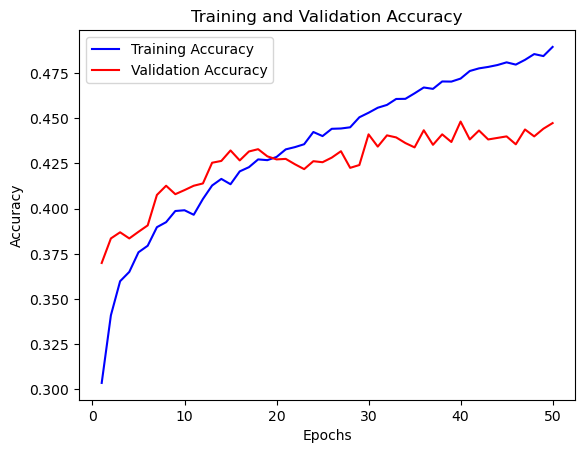

In [5]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the accuracy curve
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('/kaggle/working/accuracy_cnn_xception.png')

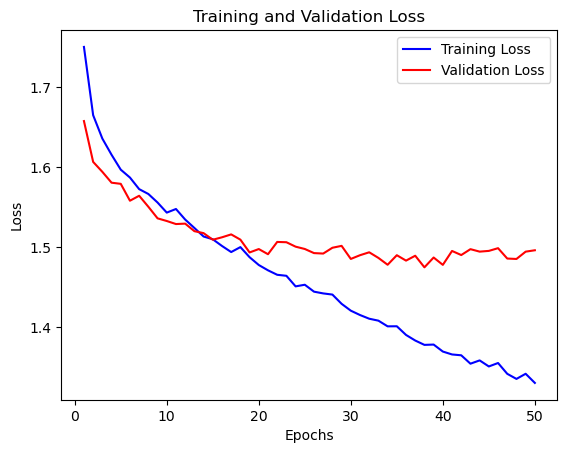

In [6]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss curve
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/kaggle/working/loss_cnn_xception.png')

In [1]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

vgg16_model = VGG16(include_top=False, weights='imagenet', input_shape=(48,48,3))

for layer in vgg16_model.layers:
    layer.trainable = False

x = Flatten()(vgg16_model.output)
x = Dense(512, activation='relu')(x)
out = Dense(7, activation='softmax')(x)
model = Model(vgg16_model.input, out)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_generator, epochs=20, batch_size=32, validation_data=val_generator)

58889256/58889256 [==============================] - 0s 0us/step


NameError: name 'train_generator' is not defined

In [5]:
train_df = pd.read_csv('/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge/train.csv')

58889256/58889256 [==============================] - 3s 0us/step


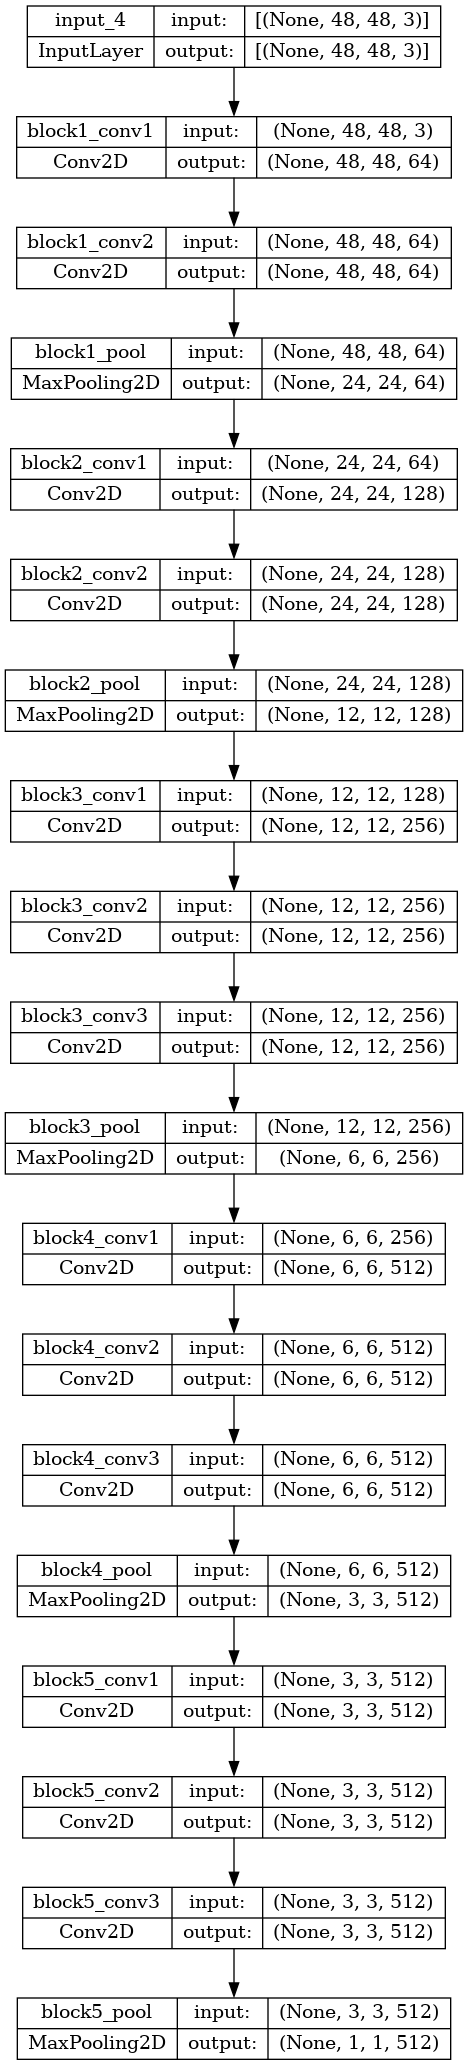

In [11]:
base_model = tf.keras.applications.VGG16(
    input_shape = (48, 48, 3), 
    include_top = False, 
    weights = 'imagenet'
)

base_model.trainable = False

tf.keras.utils.plot_model(base_model, show_shapes=True)

In [5]:
from tensorflow.keras.applications import MobileNet
base_model = MobileNet(weights='imagenet',include_top=False, input_shape=(48, 48, 3)) 

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)                  
x = Dense(7, activation='softmax')(x)  

cnn = Model(inputs=base_model.input, outputs=x)

In [6]:
np.random.seed(7)
tf.random.set_seed(7)

cnn = Sequential ([
    base_model,
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.50),
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(256, activation='relu'),
    Dropout(0.15),
    Dense(7, activation='softmax')
])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1, 1, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                        

In [9]:
from tensorflow.keras import layers
from tensorflow.keras import Model

last_layer = base_model.get_layer('mixed7')
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(7, activation='softmax')(x)         

cnn = Model(base_model.input, x)

In [7]:
opt = tf.keras.optimizers.Adam(0.001)
cnn.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.001)

In [9]:
history_1 = cnn.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    verbose=1,
    callbacks = [reduce_lr]
)

Epoch 1/30
451/451 [==============================] - 198s 392ms/step - loss: 1.9365 - accuracy: 0.2411 - val_loss: 1.7271 - val_accuracy: 0.3292 - lr: 1.0000e-04
Epoch 2/30
451/451 [==============================] - 36s 80ms/step - loss: 1.6554 - accuracy: 0.3410 - val_loss: 1.5333 - val_accuracy: 0.4151 - lr: 1.0000e-04
Epoch 3/30
451/451 [==============================] - 35s 78ms/step - loss: 1.5265 - accuracy: 0.4056 - val_loss: 1.4431 - val_accuracy: 0.4498 - lr: 1.0000e-04
Epoch 4/30
451/451 [==============================] - 36s 79ms/step - loss: 1.4298 - accuracy: 0.4470 - val_loss: 1.3743 - val_accuracy: 0.4854 - lr: 1.0000e-04
Epoch 5/30
451/451 [==============================] - 36s 79ms/step - loss: 1.3510 - accuracy: 0.4854 - val_loss: 1.3013 - val_accuracy: 0.5089 - lr: 1.0000e-04
Epoch 6/30
451/451 [==============================] - 39s 87ms/step - loss: 1.2893 - accuracy: 0.5078 - val_loss: 1.2631 - val_accuracy: 0.5201 - lr: 1.0000e-04
Epoch 7/30
451/451 [============

In [19]:
cnn.save('/kaggle/working/vgg_model.h5')

In [12]:
base_model.trainable = True
opt = tf.keras.optimizers.Adam(0.00001)
cnn.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [10]:
history_2 = cnn.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator,
    verbose=1
)

NameError: name 'cnn' is not defined

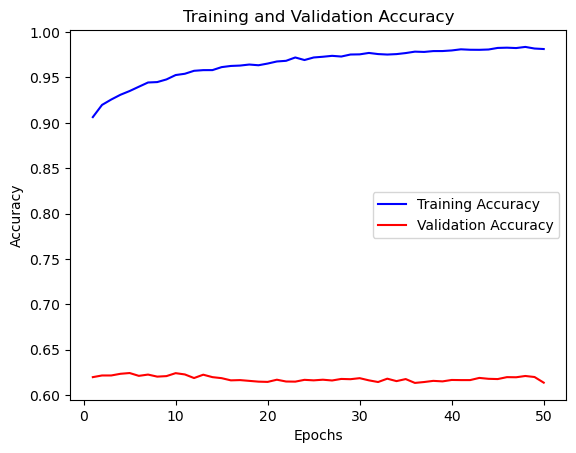

In [18]:
import matplotlib.pyplot as plt

train_acc = h2.history['accuracy']
val_acc = h2.history['val_accuracy']

# Plot the accuracy curve
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('/kaggle/working/accuracy_cnn_mobile_net_2.png')

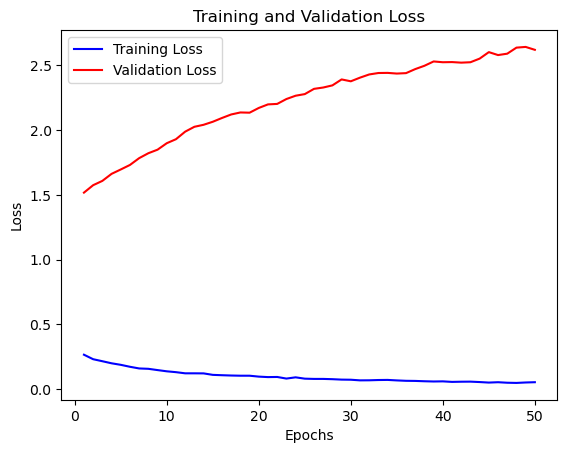

In [19]:
train_loss = h2.history['loss']
val_loss = h2.history['val_loss']

# Plot the loss curve
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('/kaggle/working/loss_cnn__2.png')

In [43]:
base_model.trainable = True
opt = tf.keras.optimizers.Adam(0.000001)
cnn.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

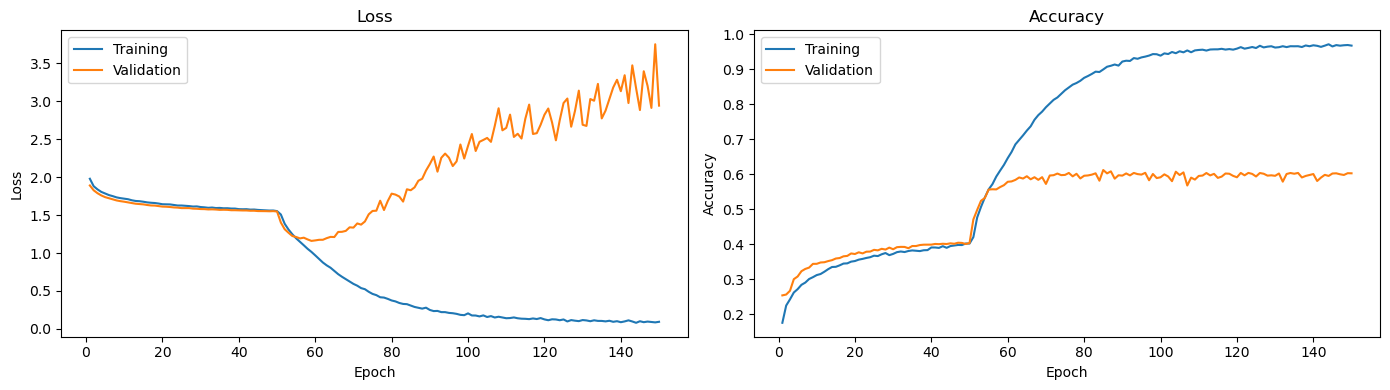

In [15]:
history = h1.history
n_epochs = len(history['loss'])
for k in history.keys():
    history[k] += h2.history[k]

epoch_range = range(1, len(history['loss'])+1)

In [ ]:
print(classification_report(trainin_output['val_labels'], trainin_output['val_preds'], target_names=image_datasets['validation'].classes))